# Airbnb Price Prediction Project Goal

Based on the Airbnb Seattle Open Data, this project aims to provide house owner an appropriate airbnb rent estimation.

### Why I come up with this idea?


There is an article about "Why Airbnb Hosts Do Not Use Airbnb Smart Pricing | Airbnb Host Tips".

https://www.passiveairbnb.com/why-smart-airbnb-hosts-do-not-use-smart-pricing/


The big problem is that smart pricing’s software will often underestimate the demand, thus pricing your property below the actual market value. Therefore, this feature seems like useless for many of the renters.

So how does Airbnb design the smart pricing features?

https://blog.atairbnb.com/smart-pricing/

### Thus, it arouses my great interest in 
- How can I predict the housing price
- How do we measure this feature if it is actually successful and actionable

My prediction of airbnb pricing are based on the data of Airbnb Seattle Dataset from Kaggle

https://www.kaggle.com/airbnb/seattle#listings.csv



Scope:
- Data Preparation
    
- Exploratary Visualization
    - Host Analysis
    - Region Analysis
    - House Analysis
      
- Feature Selection
    
- Builidng Model
    - Ridge Regression
    - Random Forrest
     
- Model Validation
    - Ridge Regression
    - Random Forrest
    - Comparation
      
- A/B testing Experiment Design for Smart Pricing Feature
      
- Resources 
    

# 0.Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

In [2]:
data = pd.read_csv('seattle/listings.csv',parse_dates=['host_since'])
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [3]:
data.shape

(3818, 92)

# 1.Exploratory Visualization

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

From the csv file, we can find we have 92 columns and 3818 entries.
According to the dataset description from data source, we will conduct several analysis:

1. Region Analysis
    - How many houses are offered in different area?
    - The overall prices' differences between regions?
    - Which Areas' houses have the highest price per tenant?




2. House Analysis
    - What's the relationship between airbnb house price and their square feet?





3. Host Analysis
    - How long do our hosts join the Airbnb platform?
    - How is their response time, does it have correlation with their price?

### Primilinary Data Cleaning

1.Turn price string to float

In [5]:
def price(x):
    return float(x[1:].replace(",",""))
data['price_cleaned'] = data['price'].apply(price)

In [6]:
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_cleaned
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,85.0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,150.0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,975.0


# 1.1 Region Analysis

In [7]:
df_neighborhood_count = data.groupby("neighbourhood_group_cleansed").count().id.sort_values(ascending=False).to_frame().reset_index()
df_neighborhood_price = data.groupby("neighbourhood_group_cleansed").mean().price_cleaned.sort_values(ascending=False).to_frame().reset_index()
data["price_per_tenant"] = data["price_cleaned"] / data["beds"]
df_neighborhood_price_per_tenant = data.groupby("neighbourhood_group_cleansed").mean().price_per_tenant.sort_values(ascending=False).to_frame().reset_index()
df_neighborhood_price_per_tenant

,neighbourhood_group_cleansed,price_per_tenant
0,Downtown,103.301539
1,Interbay,102.909091
2,Cascade,102.086142
3,Queen Anne,96.848878
4,Capitol Hill,91.282321
5,Magnolia,89.441335
6,West Seattle,78.830167
7,Central Area,77.767397
8,Ballard,73.265704
9,Other neighborhoods,72.050772


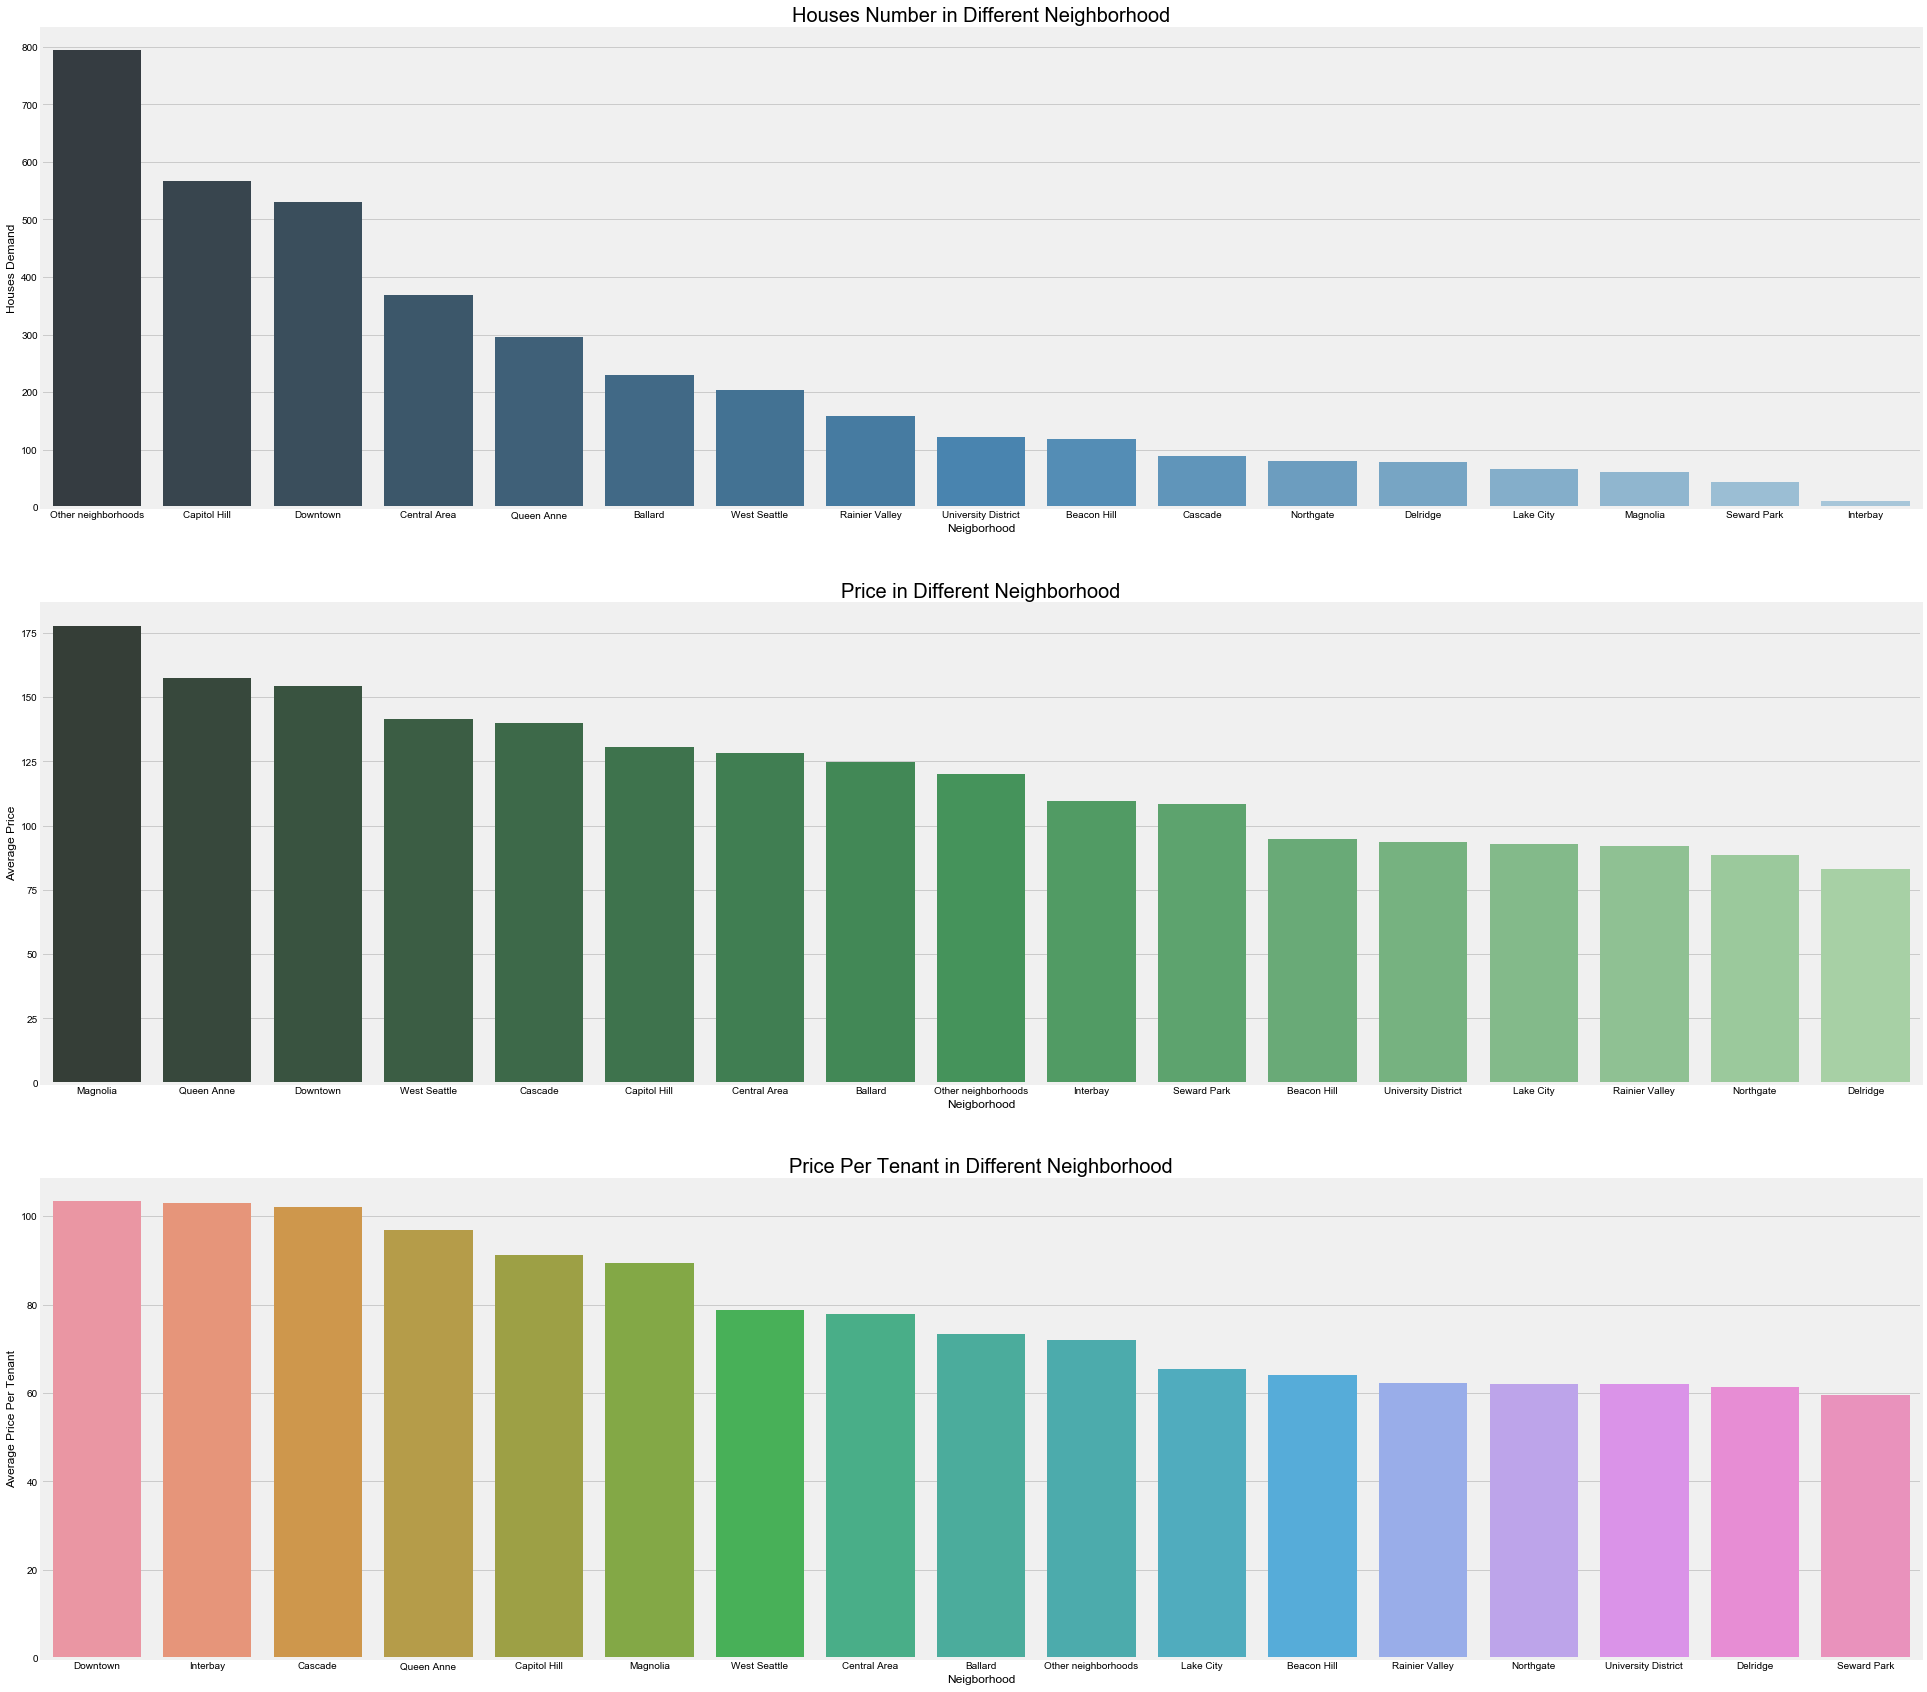

In [8]:
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(30,30))
sns.barplot(x='neighbourhood_group_cleansed', y='id', palette="Blues_d", data=df_neighborhood_count, ax=ax1)
ax1.set_title('Houses Number in Different Neighborhood',fontsize=20)
ax1.set_xlabel('Neigborhood')
ax1.set_ylabel('Houses Demand')


sns.barplot(x='neighbourhood_group_cleansed', y='price_cleaned', palette="Greens_d", data=df_neighborhood_price, ax=ax2)
ax2.set_title('Price in Different Neighborhood',fontsize=20)
ax2.set_xlabel('Neigborhood')
ax2.set_ylabel('Average Price')

sns.barplot(x='neighbourhood_group_cleansed', y="price_per_tenant",palette=None,data=df_neighborhood_price_per_tenant, ax=ax3)
ax3.set_title('Price Per Tenant in Different Neighborhood',fontsize=20)
ax3.set_xlabel('Neigborhood')
ax3.set_ylabel('Average Price Per Tenant')

plt.show()

### Explaination:
- Capital Hill, Downtown, Central Areas provide most of the Houses.
- Magnolia, Queen Anne, Downtown are three areas where airbnb houses are.
- Downtown, Interbay and Cascade are very expensive area for personal tenant.

# 1.2 House analysis

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


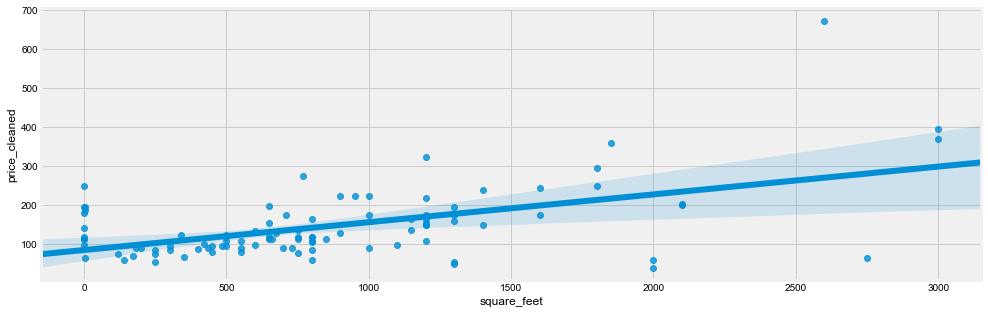

In [9]:
f, ax1= plt.subplots(1, 1, figsize=(15, 5))

sns.regplot(x='square_feet', y='price_cleaned', data=data, ax=ax1)

plt.show()

### Explaination:
Thought the sqft data is limited in this case, according to this picture, we can still find the house sqft has a strong relationship with the price

# 1.3 Host analysis

In [10]:
# calculate how long have those hosts join airbnb platform
data["host_since"] = data["host_since"].apply(lambda x: 2019 - x.year)
df_host_count = data.groupby("host_since").count().id.sort_values(ascending=False).to_frame().reset_index()

# calculate the relationship between host repsonse time and the price
df_host_response = data.groupby("host_response_time").mean().review_scores_value.sort_values(ascending=False).to_frame().reset_index()


In [11]:
df_host_response = data.groupby("host_response_time").mean()['review_scores_value'].sort_values(ascending=False).to_frame().reset_index()

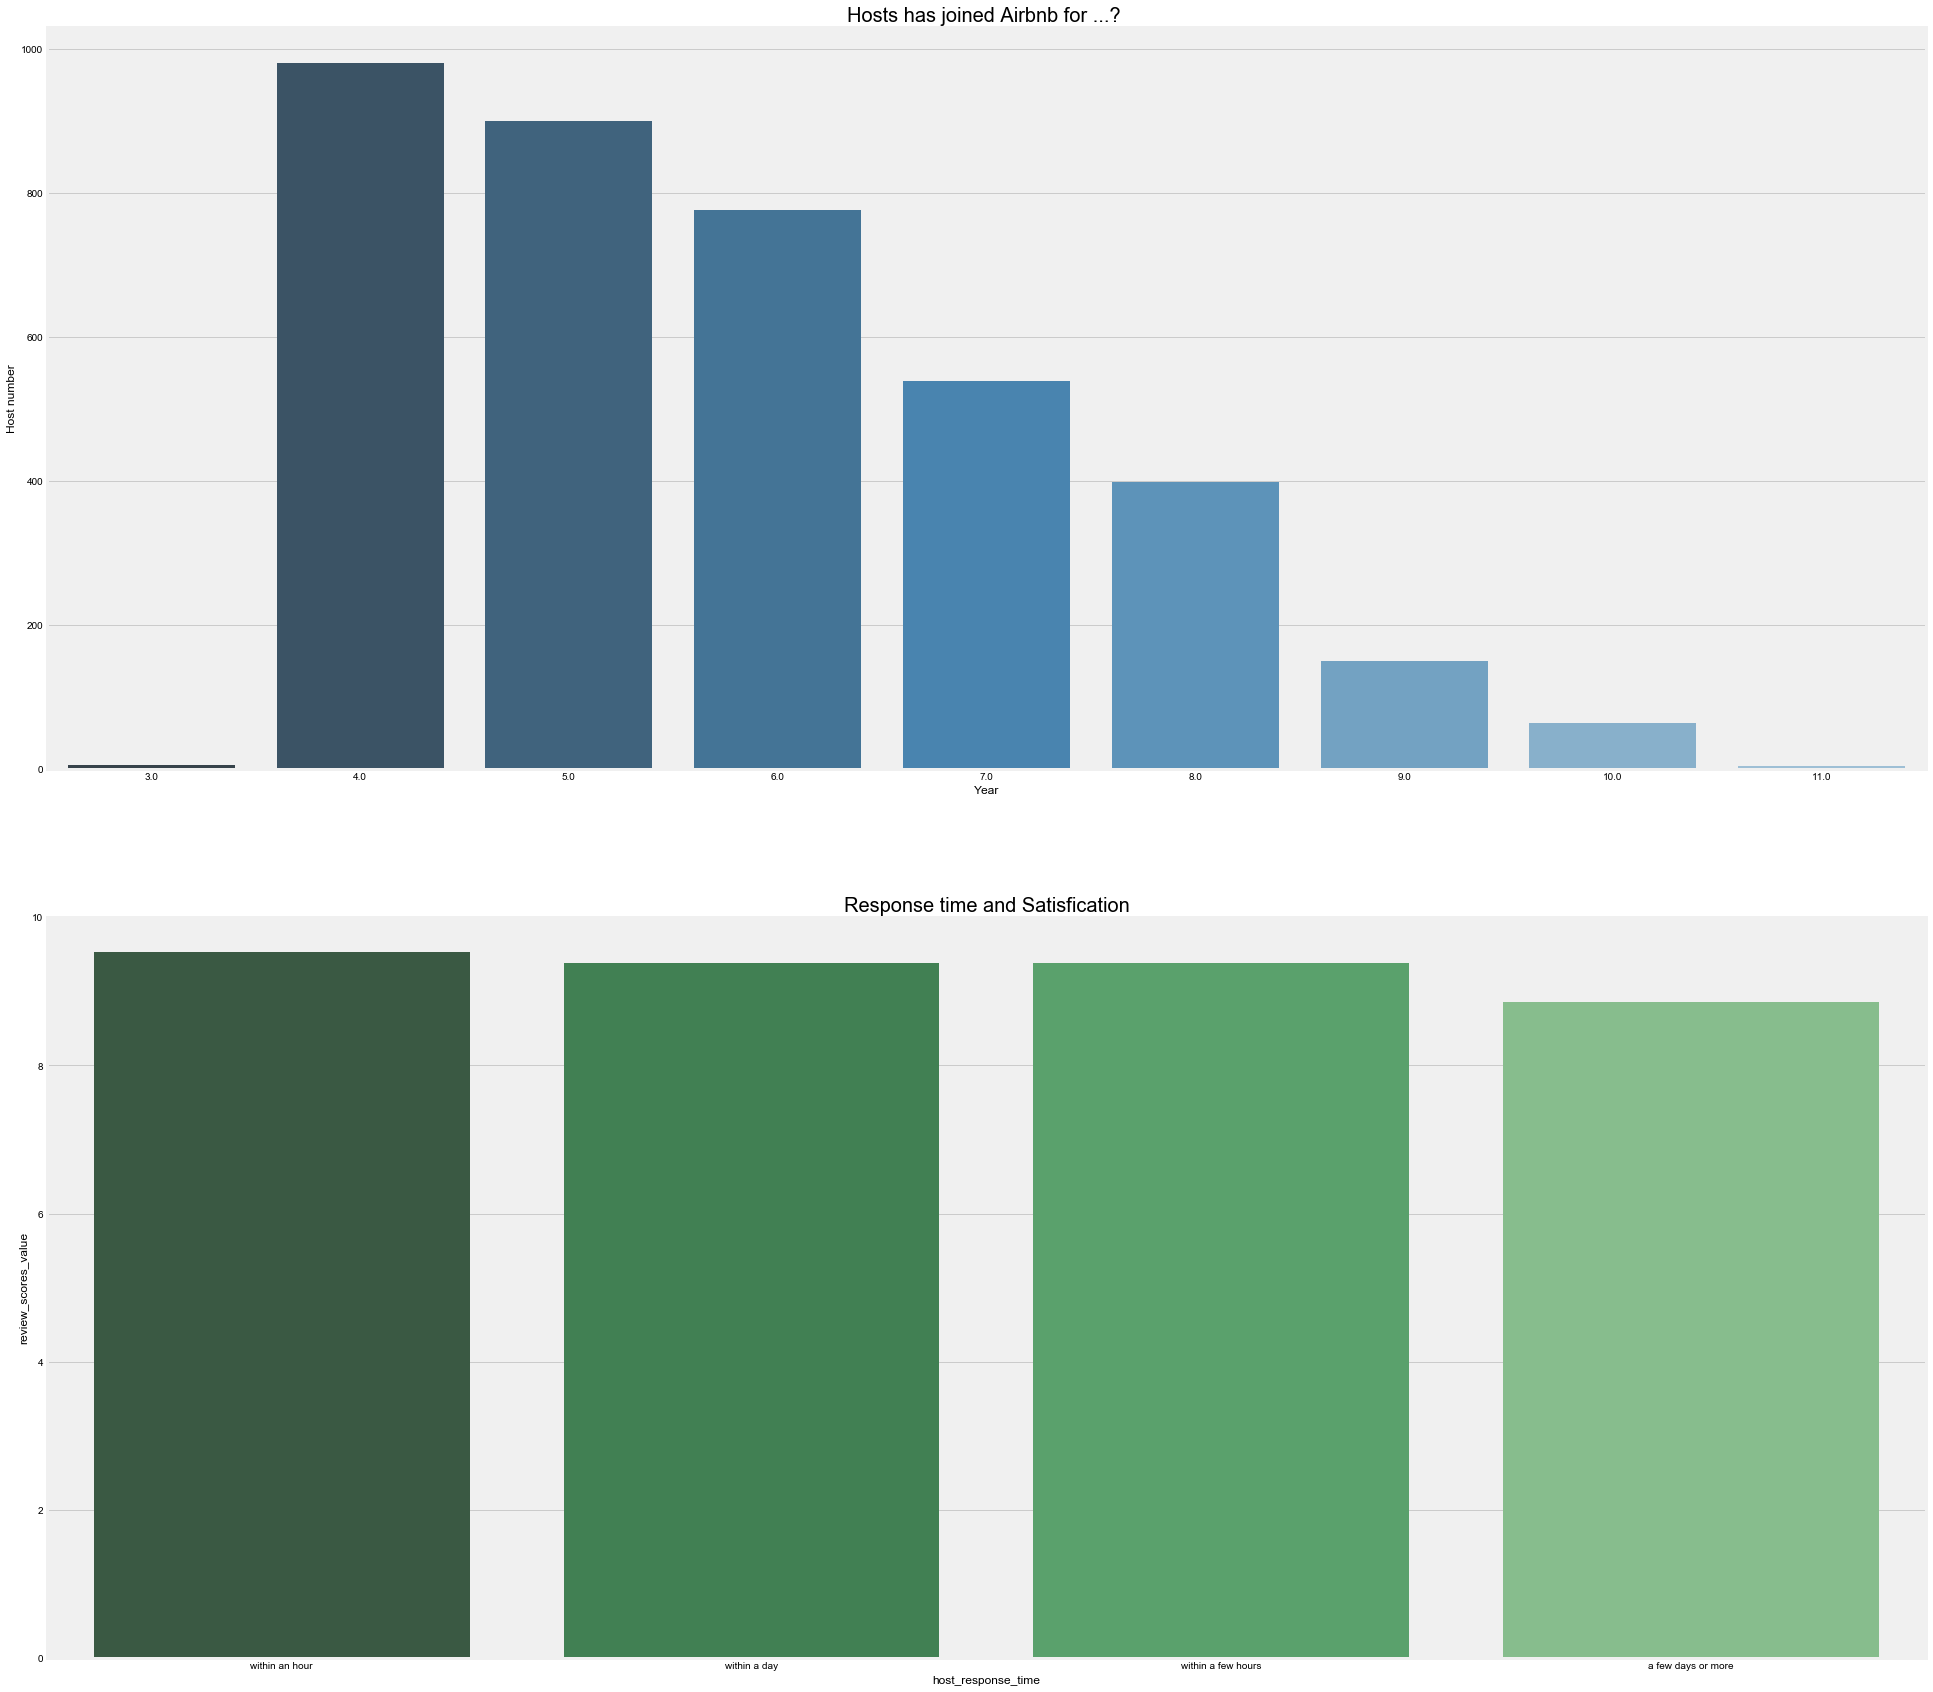

In [12]:
f, [ax1,ax2] = plt.subplots(2,1,figsize=(30,30))
sns.barplot(x='host_since', y='id', palette="Blues_d", data=df_host_count, ax=ax1)
ax1.set_title('Hosts has joined Airbnb for ...? ',fontsize=20)
ax1.set_xlabel('Year')
ax1.set_ylabel('Host number')

sns.barplot(x='host_response_time', y='review_scores_value', palette="Greens_d", data=df_host_response, ax=ax2)
ax2.set_title("Response time and Satisfication",fontsize=20)

plt.show()

### Explaination:
- In this case, most of our host haved joined the Airbnb platform for between 4 to 10 years
- The response time seems like no help for the satisfication

# 2. Feature Selection: Explore the correlation between every variables

Thanks to our cleansed data after preparing data, in the analysis of correlation between every variables,
we will ignore those missing values. 

### How to choose our input?


we can see: weekly price and monthly price, reviews_per_month have too many missing values. Because this project is 
around the prediciton of daily price, thus delete these two values.
Lisences, cleaning_fee, security deposit has too many missing values as well and has no obviously correlation
with our topic, thus will be deleted
square feet only have 97 values, too less,thus delete it.

### How to deal with the categorial variable?


In this dataset we have some categorial variables. In this case, we don't consider them.


- After choosing the input that we can make it as the feature, we can get the final input which would be considered
in this project:
          'id','host_since','host_response_rate','host_acceptance_rate','host_listings_count',
          'accommodates','bathrooms','bedrooms','beds','price','guests_included','extra_people',
           'number_of_reviews','review_scores_rating','review_scores_accuracy',
           'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
           'review_scores_location','review_scores_value','reviews_per_month'

In [13]:
input = ['id','host_since','host_response_rate','host_acceptance_rate','host_listings_count',
          'accommodates','bathrooms','bedrooms','beds','price_cleaned','guests_included','extra_people',
           'number_of_reviews','review_scores_rating','review_scores_accuracy',
           'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
           'review_scores_location','review_scores_value','reviews_per_month']

In [14]:
input_data = data[input]
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 21 columns):
id                             3818 non-null int64
host_since                     3816 non-null float64
host_response_rate             3295 non-null object
host_acceptance_rate           3045 non-null object
host_listings_count            3816 non-null float64
accommodates                   3818 non-null int64
bathrooms                      3802 non-null float64
bedrooms                       3812 non-null float64
beds                           3817 non-null float64
price_cleaned                  3818 non-null float64
guests_included                3818 non-null int64
extra_people                   3818 non-null object
number_of_reviews              3818 non-null int64
review_scores_rating           3171 non-null float64
review_scores_accuracy         3160 non-null float64
review_scores_cleanliness      3165 non-null float64
review_scores_checkin          3160 non-null float64
rev

For now, we find that
- some input are not int or float, they are string:
    host_response_rate, host_acceptance_rate,extra_people
    - we will clean it and turn it to integer or float

---

- some input have missing values:

    host_since, host_response_rate,host_acceptance_rate,host_listings_count,bathrooms,beds,review_scores_rating,
    review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,
    review_scores_location,review_scores_value,reviews_per_month
    - we will use their mean value to fill the NaN value

### clean the data: turn the string data type to float

In [15]:
input_data['host_response_rate'].fillna("999%",inplace=True)
input_data['host_acceptance_rate'].fillna("999%",inplace=True)
input_data.head(3)



/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price_cleaned,...,extra_people,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,241032,8.0,96%,100%,3.0,4,1.0,1.0,1.0,85.0,...,$5.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,953595,6.0,98%,100%,6.0,4,1.0,1.0,1.0,150.0,...,$0.00,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,3308979,5.0,67%,100%,2.0,11,4.5,5.0,7.0,975.0,...,$25.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15


In [16]:
def percent(x):
    if x is float:
        return x
    else:
        return (float(x[:-1]))

input_data['host_response_rate'] = input_data['host_response_rate'].apply(percent)
input_data['host_acceptance_rate'] = input_data['host_acceptance_rate'].apply(percent)
input_data['extra_people_cleaned'] = input_data['extra_people'].apply(lambda x: float(x[1:]))

input_data.head(3)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

,id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price_cleaned,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,extra_people_cleaned
0,241032,8.0,96.0,100.0,3.0,4,1.0,1.0,1.0,85.0,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,5.0
1,953595,6.0,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48,0.0
2,3308979,5.0,67.0,100.0,2.0,11,4.5,5.0,7.0,975.0,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15,25.0


### clean the data: fill the missing value with the mean value

In [17]:
input_data.head(10)

,id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price_cleaned,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,extra_people_cleaned
0,241032,8.0,96.0,100.0,3.0,4,1.0,1.0,1.0,85.0,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,5.0
1,953595,6.0,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48,0.0
2,3308979,5.0,67.0,100.0,2.0,11,4.5,5.0,7.0,975.0,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15,25.0
3,7421966,6.0,999.0,999.0,1.0,3,1.0,0.0,2.0,100.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,278830,8.0,100.0,999.0,2.0,6,2.0,3.0,3.0,450.0,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89,15.0
5,5956968,9.0,999.0,999.0,1.0,2,1.0,1.0,1.0,120.0,...,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.45,30.0
6,1909058,7.0,100.0,100.0,1.0,2,1.0,1.0,1.0,80.0,...,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.46,10.0
7,856550,7.0,100.0,100.0,5.0,2,1.0,1.0,1.0,60.0,...,173,97.0,10.0,10.0,10.0,10.0,9.0,10.0,4.73,0.0
8,4948745,7.0,999.0,100.0,1.0,2,1.0,1.0,1.0,90.0,...,8,97.0,10.0,9.0,10.0,9.0,10.0,10.0,1.22,0.0
9,2493658,6.0,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,...,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.55,0.0


In [18]:
# host_since, host_response_rate,host_acceptance_rate,host_listings_count,bathrooms,
# beds,review_scores_rating, review_scores_accuracy,review_scores_cleanliness,review_scores_checkin
# ,review_scores_communication, review_scores_location,review_scores_value,reviews_per_month

missing_value_feature = ['host_since', 'host_response_rate','host_acceptance_rate','host_listings_count',
                         'bathrooms','beds','review_scores_rating', 'review_scores_accuracy',
                         'review_scores_cleanliness','review_scores_checkin','review_scores_communication', 
                         'review_scores_location','review_scores_value','reviews_per_month']

input_data = input_data.fillna(999.0)

for i in missing_value_feature:
    mean = input_data[input_data[i]!=999][i].mean()
    input_data[i][input_data[i]==999] = mean

input_data

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price_cleaned,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,extra_people_cleaned
0,241032,8.0,96.000000,100.000000,3.0,4,1.0,1.0,1.0,85.0,...,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,4.070000,5.0
1,953595,6.0,98.000000,100.000000,6.0,4,1.0,1.0,1.0,150.0,...,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.480000,0.0
2,3308979,5.0,67.000000,100.000000,2.0,11,4.5,5.0,7.0,975.0,...,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.150000,25.0
3,7421966,6.0,94.886798,99.967159,1.0,3,1.0,0.0,2.0,100.0,...,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919,0.0
4,278830,8.0,100.000000,99.967159,2.0,6,2.0,3.0,3.0,450.0,...,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.890000,15.0
5,5956968,9.0,94.886798,99.967159,1.0,2,1.0,1.0,1.0,120.0,...,17,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.450000,30.0
6,1909058,7.0,100.000000,100.000000,1.0,2,1.0,1.0,1.0,80.0,...,58,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.460000,10.0
7,856550,7.0,100.000000,100.000000,5.0,2,1.0,1.0,1.0,60.0,...,173,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,4.730000,0.0
8,4948745,7.0,94.886798,100.000000,1.0,2,1.0,1.0,1.0,90.0,...,8,97.000000,10.000000,9.000000,10.000000,9.000000,10.000000,10.000000,1.220000,0.0
9,2493658,6.0,98.000000,100.000000,6.0,4,1.0,1.0,1.0,150.0,...,32,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.550000,0.0


In [19]:
input_data.head(3)

,id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price_cleaned,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,extra_people_cleaned
0,241032,8.0,96.0,100.0,3.0,4,1.0,1.0,1.0,85.0,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,5.0
1,953595,6.0,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48,0.0
2,3308979,5.0,67.0,100.0,2.0,11,4.5,5.0,7.0,975.0,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15,25.0


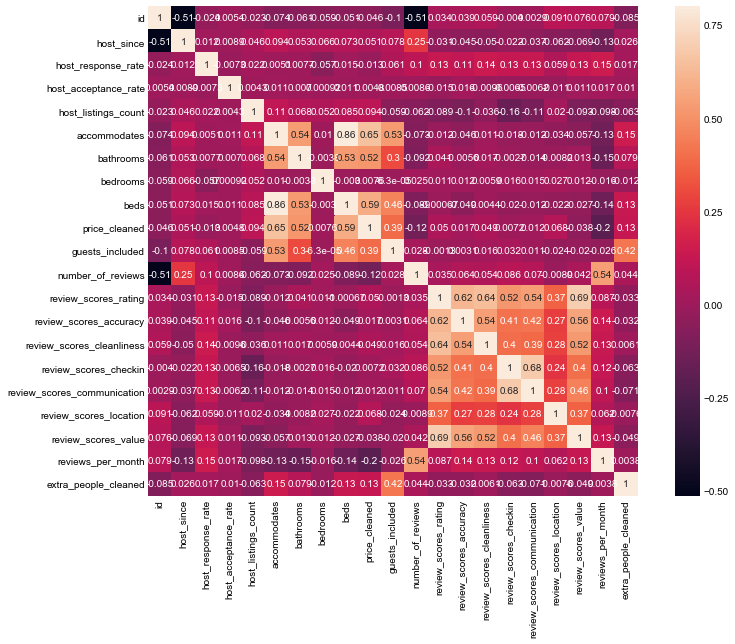

In [20]:
corrmat = input_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot= True, square=True)

# 2. Building Model

Define the cross validation evaluation metrics, we consider accommodates,bathrooms,bedrooms,beds,guest_included,extra_people as our features.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
feature = ['accommodates', 'bathrooms','bedrooms','beds','guests_included','extra_people_cleaned']
X = input_data[feature]
y = input_data['price_cleaned']
sns

<module 'seaborn' from '/anaconda3/lib/python3.7/site-packages/seaborn/__init__.py'>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


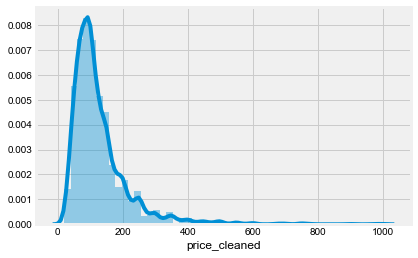

In [23]:
# 0.split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
sns.distplot(y_train)

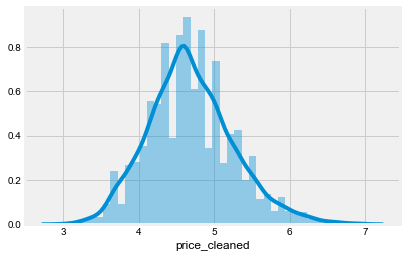

In [24]:

# 1.make it a normal distribution, thus log it.
y_train = np.log1p(y_train)
sns.distplot(y_train)

# 2.1 Ridge Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [27]:
alphas = np.logspace(-3,2,50)
alphas

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

In [28]:
# X_train = X_train.values
# y_train = y_train.values
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'Alphas vs Error')

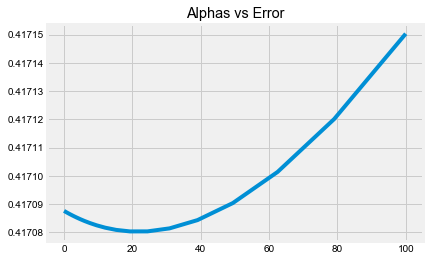

In [29]:
plt.plot(alphas,test_scores)
plt.title('Alphas vs Error')

We can find that the Error arrives the minimum value when alphas is in around 20, Error is 0.41708

# 2.2 Random Forest

Text(0.5, 1.0, 'N_estimators vs Error')

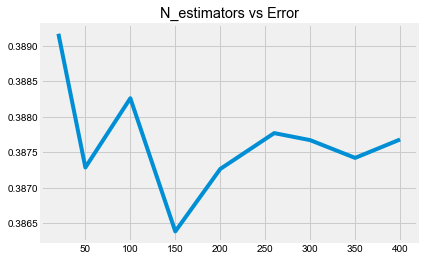

In [54]:
from sklearn.ensemble import RandomForestRegressor

N_estimators = [20,50,100,150,200,260,300,350,400]
test_scores = []
for N in N_estimators:
    clf = RandomForestRegressor(n_estimators=N, max_features = 0.3)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(N_estimators,test_scores)
plt.title('N_estimators vs Error')

The sweet spot is near 350, error is about 0.386

# Ensemble

In [49]:
ridge = Ridge(alpha = 78)
rf = RandomForestRegressor(n_estimators = 260, max_features = 0.3 )

ridge.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=260, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
# Prediction: log back the y_train 
ridge_predict = ridge.predict(X_test)
rf_predict = rf.predict(X_test)
test_score = rf.score(X_train,y_train)
print(test_score)
y_ridge = np.expm1(ridge_predict)
y_rf = np.expm1(rf_predict)

y=(ridge_predict+rf_predict)/2

0.6978622740017266


# 3. Model Validation

In [55]:
print("-----------Model Validation------------------")
test_score_ridge = ridge.score(X_train,y_train)
test_score_rf = rf.score(X_train,y_train)

print("Ridge Regression Test Score:", test_score_ridge)
print("Random Forest Test Score:", test_score_rf)

-----------Model Validation------------------
Ridge Regression Test Score: 0.45306224827041686
Random Forest Test Score: 0.6978622740017266


Conclusion:
    The Random Forest Effectiveness is much  much better than Ridge Regression in this case
    
    

# 4.A/B Testing Design on Smart Pricing Feature

<img src="airbnb-fig-2.jpeg">

### Feature Discription:


With Smart Pricing hosts can set a min and max price and then any new price suggestions generated by Airbnb that fall within these ranges will be automatically adopted for all available nights.

This feature expects that the reservation rate on the website, finally benefiting the hosts. 

### Goal: Improving the reseravation rate


### Metrics: 
1.transaction success rate


### Experiment Precedure:
1.split into two team randomly: control and chanllenger
2.use the A/B testing tool and run experiement for 1 week
3.Observe the difference of reservation rate of same renters and compare it to the control team outcomes.

### Other Resources:
  
##### How Airbnb Designed the smart pricing feature 
[Customized regression model for Airbnb dynamic pricing](https://blog.acolyer.org/2018/10/03/customized-regression-model-for-airbnb-dynamic-pricing/)

##### Ridge Regression and Random Forest Housing Prediction(Chinese Version)
[Entry to Machine Learning](https://zhuanlan.zhihu.com/p/38622109)

